In [419]:
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pylab as pl


In [420]:
###READ/LOAD DATA###
def read_data(file_name):
    """
    Read file into python. 
    Inputs: file_name(string)
    Return: Pandas datafame
    """
    assert os.path.exists(file_name), "That file does not exist!"
    if file_name[-3:] == "csv":
        df = pd.read_csv(file_name)
        return df
    
    if file_name[-3:] == "xls":
        df = pd.read_excel(file_name)
        return df

In [421]:
credit_data = read_data("credit-data.csv")


In [422]:
###EXPLORE DATA###
def get_col_means(df, column_names, return_value=True):
    '''
    Get the mean value of specified column
    Input:
    Return: Mean value(float) or print statement
    '''
    for i in range(len(column_names)):
        assert type(df[column_names[i]].iloc[0]) is not str, "Cannot take the mean of strings! Trying selecting another column." 
    
    mean_list = []
    for col in column_names:
        mean_list.append(df[col].mean())
        
    if return_value:
            return mean_list
    else:
        for i,val in enumerate(column_names):
            print("The mean of" + " " + val + " " "is" + " " + str(mean_list[i]))


In [423]:
get_col_means(credit_data, ["age", "DebtRatio"], return_value=False)

The mean of age is 52.2952066667
The mean of DebtRatio is 353.005075764


In [424]:
def get_statistics(df):
    '''Get general descriptive statistics for a data frame.'''
    return df.describe()

In [425]:
get_statistics(credit_data)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [426]:
def get_frequency_chart(df, column_name, chart_type):
    '''
    Display counts of a column's unique values. 
    
    Inputs: dataframe
            column_name - string
            chart_type - string in ['pie', 'bar', 'barh']
    '''
    plot = df[column_name].value_counts().plot(chart_type)
    plt.title('Distribution of' + ' ' + column_name)
    
    if chart_type == "bar":
        plot.set_xlabel(column_name)
        plot.set_ylabel('frequency')
        
    if chart_type == "barh":
        plot.set_xlabel('frequency')
        plot.set_ylabel(column_name)
        
    plt.show(plot)

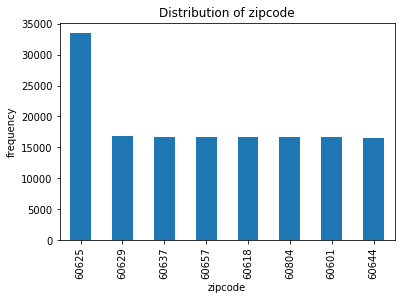

In [427]:
get_frequency_chart(credit_data, "zipcode", "bar")

In [447]:
def graph_crosstab(df, col1, col2):
    '''
    Graph crosstab of two discrete variables
    
    Inputs: Dataframe, column names (strings)
    '''
    
    pd.crosstab(df[col1], df[col2]).plot(kind='bar')
    plt.title(col2 + " " + "distribution by" + " " + col1)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

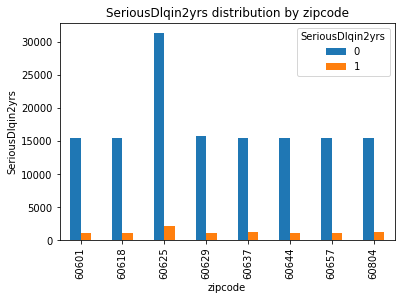

In [449]:
graph_crosstab(credit_data, 'zipcode', 'SeriousDlqin2yrs')

In [469]:
def stats_by_var(df, col_name, stat):
    '''
    Get descriptive statistics of all variables in dataframe, by selected column. The values 
    in the column should not be continous. 
    '''
    
    if stat == 'mean':
        return df.groupby(col_name).mean()  
        
    if stat == 'median':
        return df.groupby(col_name).median()        
    
    if stat == 'mode':
        return df.groupby(col_name).mode()  

In [479]:
stats = stats_by_var(credit_data, "SeriousDlqin2yrs", 'mean')
stats[['DebtRatio', 'MonthlyIncome']]


,DebtRatio,MonthlyIncome
SeriousDlqin2yrs,,
0,357.151168,6747.837774
1,295.121066,5630.826493


In [480]:
###PRE-PROCESS AND CLEAN DATA###

def fill_missing(df, column_name, stat):
    """
    Fill in missing values for one column. 
    Inputs: dataframe
            column_name - string
            stat - string in [mean, median, mode]
    """
    mean = df[column_name].mean()
    median = df[column_name].median()
    mode = df[column_name].mode()
    
    if stat == 'mean':
        df[[column_name]] = df[[column_name]].fillna(value=mean)
        
    if stat == 'median':
        df[[column_name]] = df[[column_name]].fillna(value=median)
        
    if stat == 'mode':
        df[[column_name]] = df[[column_name]].fillna(value=mode)   

In [481]:
credit_data.isnull().sum()

PersonID                                    0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
zipcode                                     0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [482]:
fill_missing(credit_data, "MonthlyIncome", 'median')

In [483]:
credit_data.isnull().sum()

PersonID                                   0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
zipcode                                    0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
dtype: int64

In [484]:
###GENERATE FEATURES/PREDICTORS###

def discretize(df, col_name, new_col_name, quartiles, labels):
    '''
    Transform a continuous variable into discrete variable.
    
    Inputs: dataframe
            colum_name - string
            new_col_name - string
            quartiles - integer (ex: 2 creates bins above & below 50% percentile)
            labels - list of length blah; if None, retains range of values
            
    Return: dataframe with discrete variable column added
    '''
    df[new_col_name] = pd.qcut(df[col_name], quartiles, labels = labels)
    return df
    
def make_binary(df, column_names):
    '''
    Transform categorical variable into dummy variable and add columns to dataframe. 
    
    Inputs: dataframe
            column_names - list of strings
    Return: dataframe with dummy columns added
    '''
    return pd.get_dummies(df, columns = column_names)


In [490]:
discretize(credit_data, 'DebtRatio', "DebtRatio_cat", 8, None)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_cat
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0,"(0.5, 0.868]"
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0,"(0.0604, 0.175]"
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0,"(0.0604, 0.175]"
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0,"[0, 0.0604]"
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0,"[0, 0.0604]"
5,6,0,0.213179,74,60629,0,0.375607,3500.0,3,0,1,0,1.0,"(0.367, 0.5]"
6,7,0,0.305682,57,60637,0,5710.000000,5400.0,8,0,3,0,0.0,"(734, 329664]"
7,8,0,0.754464,39,60625,0,0.209940,3500.0,8,0,0,0,0.0,"(0.175, 0.269]"
8,9,0,0.116951,27,60804,0,46.000000,5400.0,2,0,0,0,NaN,"(0.868, 734]"
9,10,0,0.189169,57,60629,0,0.606291,23684.0,9,0,4,0,2.0,"(0.5, 0.868]"


In [491]:
make_binary(credit_data, ['DebtRatio_cat'])

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,...,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"DebtRatio_cat_[0, 0.0604]","DebtRatio_cat_(0.0604, 0.175]","DebtRatio_cat_(0.175, 0.269]","DebtRatio_cat_(0.269, 0.367]","DebtRatio_cat_(0.367, 0.5]","DebtRatio_cat_(0.5, 0.868]","DebtRatio_cat_(0.868, 734]","DebtRatio_cat_(734, 329664]"
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,...,0,2.0,0,0,0,0,0,1,0,0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,...,0,1.0,0,1,0,0,0,0,0,0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,...,0,0.0,0,1,0,0,0,0,0,0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,...,0,0.0,1,0,0,0,0,0,0,0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,...,0,0.0,1,0,0,0,0,0,0,0
5,6,0,0.213179,74,60629,0,0.375607,3500.0,3,0,...,0,1.0,0,0,0,0,1,0,0,0
6,7,0,0.305682,57,60637,0,5710.000000,5400.0,8,0,...,0,0.0,0,0,0,0,0,0,0,1
7,8,0,0.754464,39,60625,0,0.209940,3500.0,8,0,...,0,0.0,0,0,1,0,0,0,0,0
8,9,0,0.116951,27,60804,0,46.000000,5400.0,2,0,...,0,NaN,0,0,0,0,0,0,1,0
9,10,0,0.189169,57,60629,0,0.606291,23684.0,9,0,...,0,2.0,0,0,0,0,0,1,0,0


In [492]:
###BUILD MACHINE LEARNING CLASSIFIER###
model = LogisticRegression()
features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'zipcode', 'DebtRatio', 'MonthlyIncome','NumberOfTimes90DaysLate']
model = model.fit(credit_data[features], credit_data.SeriousDlqin2yrs)

In [493]:
model.predict(credit_data[features])[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [494]:
model.predict_proba(credit_data[features])[:10]

array([[ 0.93099225,  0.06900775],
       [ 0.90722583,  0.09277417],
       [ 0.90040643,  0.09959357],
       [ 0.88143901,  0.11856099],
       [ 0.98500678,  0.01499322],
       [ 0.96436251,  0.03563749],
       [ 0.95170553,  0.04829447],
       [ 0.90678628,  0.09321372],
       [ 0.87862722,  0.12137278],
       [ 0.96592744,  0.03407256]])

In [495]:
###EVALUATE CLASSIFIER###
model.score(credit_data[features], credit_data.SeriousDlqin2yrs)

0.93332000000000004

In [496]:
predicted = model.predict(credit_data[features])
metrics.accuracy_score(credit_data.SeriousDlqin2yrs, predicted)

0.93332000000000004

In [497]:
credit_data.SeriousDlqin2yrs.mean()
#Accuracy is the nearly same as guessing 0 for everything! 

0.066839999999999997

In [499]:
print(classification_report(credit_data.SeriousDlqin2yrs, predicted))

             precision    recall  f1-score   support

          0       0.93      1.00      0.97    139974
          1       0.55      0.01      0.03     10026

avg / total       0.91      0.93      0.90    150000



In [500]:
confusion_matrix(credit_data.SeriousDlqin2yrs, predicted)

array([[139854,    120],
       [  9882,    144]])

In [501]:
pd.DataFrame(np.transpose(model.coef_), features)

,0
RevolvingUtilizationOfUnsecuredLines,-0.000045
age,-0.029229
zipcode,-0.000017
DebtRatio,-0.000022
MonthlyIncome,-0.000027
NumberOfTimes90DaysLate,0.031284
